In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from zlib import crc32
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sbn

# Data identification and data segmentation implementation

In [4]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df['longitude'].mean()

-119.56970445736432

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

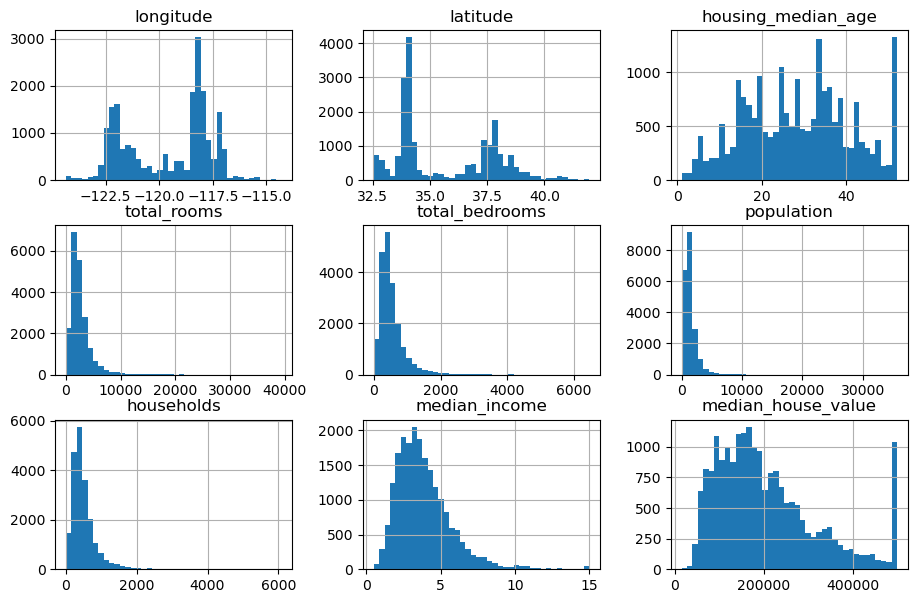

In [9]:
df.hist(bins = 40 , figsize = (11 , 7))

# Train & Test Test

In [11]:
# np.random.permutation(len(df))

In [12]:
def shuffle_and_split_df(df , test_ratio):
    np.random.seed(40)
    random_indices = np.random.permutation(len(df))
    test_set_size  = int(len(df) * test_ratio)
    test_random_indices  = random_indices[:test_set_size]
    train_random_indices = random_indices[test_set_size:]
    return df.iloc[train_random_indices] , df.iloc[test_random_indices]

In [13]:
train_set , test_set = shuffle_and_split_df(df , 0.2)

In [14]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6607,-118.14,34.18,47.0,3457.0,622.0,1700.0,579.0,3.5164,226500.0,<1H OCEAN
884,-121.97,37.54,31.0,1949.0,344.0,986.0,322.0,4.6349,196200.0,<1H OCEAN
9457,-123.84,39.83,19.0,1461.0,340.0,515.0,227.0,1.5278,145800.0,NEAR OCEAN
18681,-121.82,36.86,17.0,1573.0,272.0,142.0,55.0,2.1719,420000.0,NEAR OCEAN
4654,-118.33,34.05,48.0,2405.0,527.0,1868.0,502.0,3.3750,257800.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
19314,-122.87,38.43,36.0,1987.0,387.0,1065.0,347.0,4.0446,172200.0,<1H OCEAN
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,<1H OCEAN
3631,-118.43,34.23,35.0,2049.0,390.0,1286.0,385.0,4.4432,181500.0,<1H OCEAN
3689,-118.36,34.23,15.0,2485.0,742.0,1994.0,670.0,2.8333,183200.0,<1H OCEAN


**Crc32**

In [16]:
def is_identifier_in_test_set(identifier , test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2 ** 32

In [17]:
def split_train_set_with_identifier_hash(df , test_ratio , identifier_column):
    identifiers = df[identifier_column]
    in_test_set = identifiers.apply(lambda id_: is_identifier_in_test_set(id_ , test_ratio))
    return df.loc[~in_test_set] , df.loc[in_test_set]

In [18]:
df.reset_index()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [19]:
df_with_identifier = df
df_with_identifier['identifier'] = df['longitude'] * 1000 + df['latitude']
df_with_identifier

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [20]:
train_set , test_set = split_train_set_with_identifier_hash(df_with_identifier , 0.2 , 'identifier')

In [21]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [22]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20
...,...,...,...,...,...,...,...,...,...,...,...
20616,-121.53,39.08,15.0,1810.0,441.0,1157.0,375.0,2.0469,55100.0,INLAND,-121490.92
20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND,-121490.94
20618,-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.2500,63400.0,INLAND,-121510.94
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND,-121410.74


In [23]:
len(train_set) / len(df)

0.7907945736434109

In [24]:
len(test_set) / len(df)

0.20920542635658915

**SKlearn(train_test_split)**

In [26]:
train_set , test_set = tts(df , test_size = 0.2 ,random_state = 42)

In [27]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,-118973.94
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,-119424.86
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,-122402.20
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,-118685.72
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,-121893.38
...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN,-117186.64
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN,-120794.64
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN,-122012.69
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND,-119723.23


**Stratified Sampling(StratifiedShuffleSplit)**

In [29]:
df['median_income_categories']  = pd.cut(df['median_income'] , bins = [0.0 , 1.5 , 3.0 , 4.5 , 6.0 , np.inf], labels = [1 , 2 , 3 , 4 , 5])

In [30]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,median_income_categories
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57,2


<Axes: xlabel='median_income_categories'>

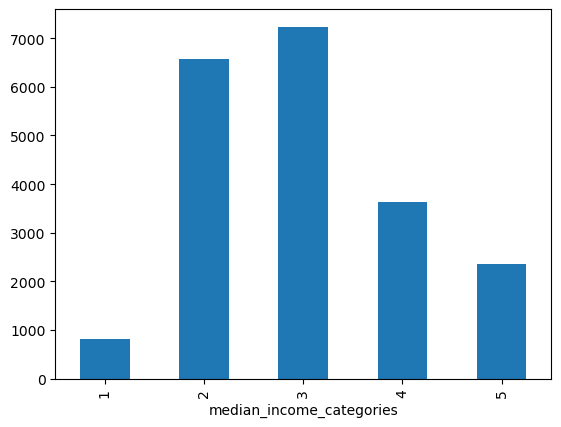

In [31]:
df['median_income_categories'].value_counts().sort_index().plot.bar()

In [32]:
sss = StratifiedShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state = 42)
stratified_split = []
for train_i , test_i in sss.split(df , df['median_income_categories']):
    stratified_train_set_n = df.iloc[train_i]
    stratified_test_set_n  = df.iloc[test_i]
    stratified_split.append([stratified_train_set_n , stratified_test_set_n])

In [33]:
stratified_split

[[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
  12655    -121.46     38.52                29.0       3873.0           797.0   
  15502    -117.23     33.09                 7.0       5320.0           855.0   
  2908     -119.04     35.37                44.0       1618.0           310.0   
  14053    -117.13     32.75                24.0       1877.0           519.0   
  20496    -118.70     34.28                27.0       3536.0           646.0   
  ...          ...       ...                 ...          ...             ...   
  15174    -117.07     33.03                14.0       6665.0          1231.0   
  12661    -121.42     38.51                15.0       7901.0          1422.0   
  19263    -122.72     38.44                48.0        707.0           166.0   
  19140    -122.70     38.31                14.0       3155.0           580.0   
  19773    -122.14     39.97                27.0       1079.0           222.0   
  
         population  hous

In [34]:
stratified_train_set , stratified_test_set = stratified_split[0]

In [35]:
stratified_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,median_income_categories
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,-121421.48,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,-117196.91,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,-119004.63,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,-117097.25,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,-118665.72,3
...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,-117036.97,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,-121381.49,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,-122681.56,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,-122661.69,3


In [36]:
stratified_train_set['median_income_categories'].value_counts() / len(stratified_train_set)  

median_income_categories
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [37]:
 stratified_test_set['median_income_categories'].value_counts() / len(stratified_test_set) 

median_income_categories
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

**StratifiedShuffleSplit in skleran**

In [39]:
str_train_set , str_test_set = tts(df , test_size = 0.2 , stratify = df['median_income_categories'] , random_state = 42)

In [40]:
str_train_set = str_train_set.drop('median_income_categories' , axis = 1)

In [41]:
str_test_set = str_test_set.drop('median_income_categories' , axis = 1)

**Visualize**

In [43]:
train = str_train_set

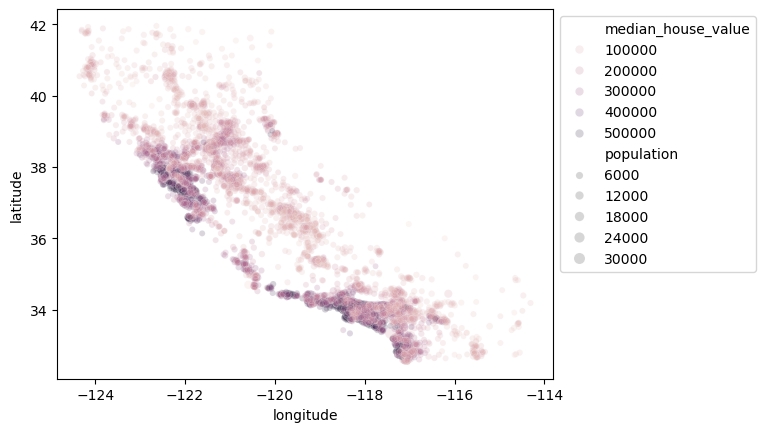

In [44]:
ax = sbn.scatterplot(data = train , x = 'longitude' , 
                y = 'latitude' ,
                size = 'population' ,
                alpha = 0.2 ,
                hue = 'median_house_value' ,
                )
sbn.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [45]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,-121421.48
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,-117196.91
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,-119004.63
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,-117097.25
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,-118665.72
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,-117036.97
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,-121381.49
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,-122681.56
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,-122661.69


# Correlations

In [47]:
train_double = train.drop('ocean_proximity' , axis = 1)

In [48]:
train_double.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,identifier
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,1.000000
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,-0.924323
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.105921
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,0.048915
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,0.076684
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882,0.108055
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590,0.063125
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151,-0.019715
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000,-0.047665
identifier,1.000000,-0.924323,-0.105921,0.048915,0.076684,0.108055,0.063125,-0.019715,-0.047665,1.000000


In [49]:
train_double.corr()['median_house_value']

longitude            -0.047466
latitude             -0.142673
housing_median_age    0.114146
total_rooms           0.135140
total_bedrooms        0.047781
population           -0.026882
households            0.064590
median_income         0.687151
median_house_value    1.000000
identifier           -0.047665
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

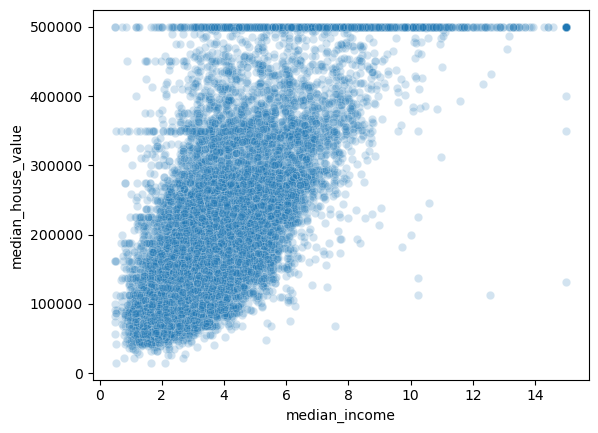

In [50]:
sbn.scatterplot(data = train , x = 'median_income' , y = 'median_house_value' , alpha = 0.2)

**Attribute Combinations**

In [52]:
train['room_per_house']   = train['total_rooms'] / train['households']
train['bed_rooms_ratio']  = train['total_bedrooms'] / train['total_rooms']
train['people_per_house'] = train['population'] / train['households']
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,room_per_house,bed_rooms_ratio,people_per_house
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,-121421.48,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,-117196.91,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,-119004.63,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,-117097.25,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,-118665.72,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,-117036.97,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,-121381.49,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,-122681.56,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,-122661.69,6.297405,0.183835,2.411178


In [53]:
train2 = train.drop('ocean_proximity' , axis = 1)

In [54]:
train2.corr()['median_house_value']

longitude            -0.047466
latitude             -0.142673
housing_median_age    0.114146
total_rooms           0.135140
total_bedrooms        0.047781
population           -0.026882
households            0.064590
median_income         0.687151
median_house_value    1.000000
identifier           -0.047665
room_per_house        0.146255
bed_rooms_ratio      -0.259952
people_per_house     -0.021991
Name: median_house_value, dtype: float64

## Prepare Data

In [56]:
train_features = train.drop(['median_house_value'] , axis = 1)
train_target = train['median_house_value']
train_features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,identifier,room_per_house,bed_rooms_ratio,people_per_house
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,-121421.48,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,-117196.91,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,-119004.63,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,-117097.25,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,-118665.72,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN,-117036.97,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,-121381.49,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,-122681.56,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,-122661.69,6.297405,0.183835,2.411178


**Data Cleaning**

In [58]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  room_per_house      16512 non-null  float64
 11  bed_rooms_ratio     16354 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [59]:
train_features.dropna(subset = ['total_bedrooms']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 16354 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16354 non-null  float64
 1   latitude            16354 non-null  float64
 2   housing_median_age  16354 non-null  float64
 3   total_rooms         16354 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16354 non-null  float64
 6   households          16354 non-null  float64
 7   median_income       16354 non-null  float64
 8   ocean_proximity     16354 non-null  object 
 9   identifier          16354 non-null  float64
 10  room_per_house      16354 non-null  float64
 11  bed_rooms_ratio     16354 non-null  float64
 12  people_per_house    16354 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.7+ MB


In [60]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  room_per_house      16512 non-null  float64
 11  bed_rooms_ratio     16354 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [61]:
# train_features_with_imputed_na_values
total_bedrooms_median = train_features['total_bedrooms'].median()
total_bedrooms_median


train_features['total_bedrooms'] = train_features['total_bedrooms'].fillna(total_bedrooms_median)

In [62]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  room_per_house      16512 non-null  float64
 11  bed_rooms_ratio     16354 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [63]:
train_features['bed_rooms_ratio']  = train_features['total_bedrooms'] / train_features['total_rooms']

In [64]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  room_per_house      16512 non-null  float64
 11  bed_rooms_ratio     16512 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


# SKlearn Impute

**Simple Imputer**

In [67]:
from sklearn.impute import SimpleImputer

In [68]:
simple_imputer = SimpleImputer(strategy = 'median')

In [69]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  room_per_house      16512 non-null  float64
 11  bed_rooms_ratio     16512 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


**numeric features**

In [71]:
train_features_numeric = train_features.select_dtypes([np.number])

In [72]:
train_features_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   identifier          16512 non-null  float64
 9   room_per_house      16512 non-null  float64
 10  bed_rooms_ratio     16512 non-null  float64
 11  people_per_house    16512 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


In [73]:
simple_imputer.fit(train_features_numeric)
# train_features_numeric.median().values

SimpleImputer(strategy='median')

In [74]:
simple_imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
       -1.18475875e+05,  5.23234164e+00,  2.03046429e-01,  2.81766108e+00])

In [75]:
simple_imputer.transform(train_features_numeric)

array([[-121.46      ,   38.52      ,   29.        , ...,    5.48583569,
           0.20578363,    3.16855524],
       [-117.23      ,   33.09      ,    7.        , ...,    6.92708333,
           0.16071429,    2.62369792],
       [-119.04      ,   35.37      ,   44.        , ...,    5.39333333,
           0.19159456,    2.22333333],
       ...,
       [-122.72      ,   38.44      ,   48.        , ...,    4.11046512,
           0.23479491,    2.6627907 ],
       [-122.7       ,   38.31      ,   14.        , ...,    6.29740519,
           0.18383518,    2.41117764],
       [-122.14      ,   39.97      ,   27.        , ...,    5.47715736,
           0.20574606,    3.17258883]])

In [76]:
train_features_numeric = pd.DataFrame(simple_imputer.transform(train_features_numeric) , columns = train_features_numeric.columns,
                                                                index = train_features_numeric.index)

# sklearn Design pattern

**1.Consistency()**

**2.estimator**

**3.transformer**

**4.predictors**

**5.Inspection**

**6.Compositio**

# OrdinalEncoder & OneHotEncoder
**(videos part 19 & 20)**

**Categorical Features**

In [81]:
train_features[['ocean_proximity']].value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

In [82]:
train_features_categorical = train_features[['ocean_proximity']]

In [83]:
from sklearn.preprocessing import OrdinalEncoder

In [84]:
oe = OrdinalEncoder()
ocean_proximity_index = oe.fit_transform(train_features_categorical)
ocean_proximity_index

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [85]:
train_features[['ocean_proximity']]

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [86]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [87]:
from sklearn.preprocessing import OneHotEncoder

In [88]:
ohe = OneHotEncoder()
ocean_proximity_ohe = ohe.fit_transform(train_features_categorical)

In [89]:
ocean_proximity_ohe.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [90]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [91]:
ohe.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [92]:
train_features_categorical_ohe = pd.DataFrame(ocean_proximity_ohe.toarray() , columns = ohe.get_feature_names_out())

# Feature Scaling

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
mms = MinMaxScaler(feature_range=(-1, 1))

In [96]:
mms.fit_transform(train_features_numeric)

array([[-0.42430279,  0.27098831,  0.09803922, ..., -0.93812413,
        -0.878327  , -0.99601454],
       [ 0.41832669, -0.88310308, -0.76470588, ..., -0.91764876,
        -0.91081283, -0.99689148],
       [ 0.05776892, -0.39851222,  0.68627451, ..., -0.93943828,
        -0.88855444, -0.99753585],
       ...,
       [-0.6752988 ,  0.25398512,  0.84313725, ..., -0.95766361,
        -0.85741578, -0.99682856],
       [-0.67131474,  0.22635494, -0.49019608, ..., -0.92659441,
        -0.89414737, -0.99723352],
       [-0.55976096,  0.57917109,  0.01960784, ..., -0.93824742,
        -0.87835408, -0.99600805]])

In [97]:
mms.fit_transform(train_features_numeric).min()

-1.0

In [98]:
mms.fit_transform(train_features_numeric).max()

1.0000000000000002

# StandardScaler

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
ss = StandardScaler()

In [102]:
ss.fit_transform(train_features_numeric)

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
        -0.12112176,  0.00622264],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.81086696, -0.04081077],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.33827252, -0.07537122],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
         0.32286937, -0.03743619],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.45702273, -0.05915604],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
        -0.12169672,  0.00657083]])

In [103]:
ss.fit_transform(train_features_numeric).min()

-2.704505756921388

In [104]:
ss.fit_transform(train_features_numeric).max()

107.0602682679687

# Data Transformation

**Log Transformation**

<Axes: >

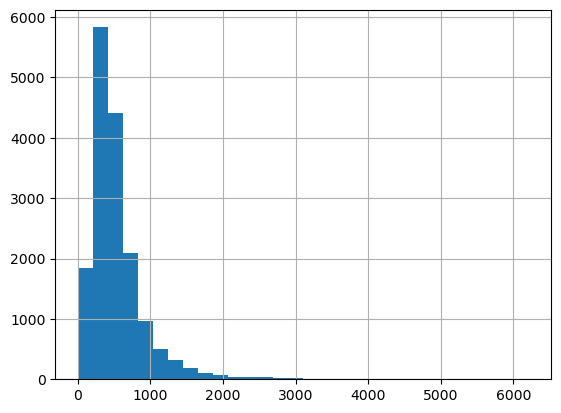

In [107]:
train_features_numeric['total_bedrooms'].hist(bins = 30)

<Axes: >

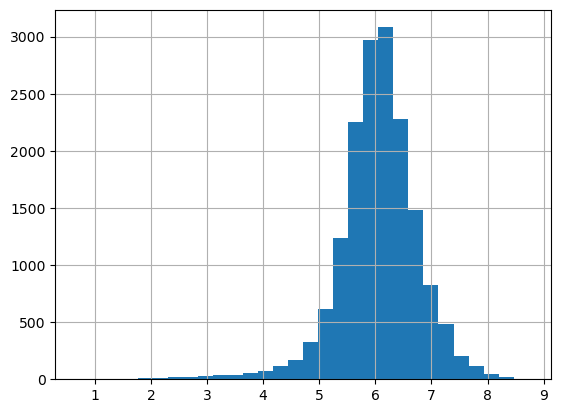

In [108]:
train_features_numeric['total_bedrooms'].apply(np.log).hist(bins = 30)

**Multi Modal Transformation**

In [110]:
from sklearn.metrics.pairwise import rbf_kernel

In [111]:
rbf_kernel(train_features_numeric[['housing_median_age']] , [[35]] , gamma = 0.1)

array([[2.73237224e-02],
       [8.93948745e-35],
       [3.03539138e-04],
       ...,
       [4.57533877e-08],
       [7.04065961e-20],
       [1.66155727e-03]])

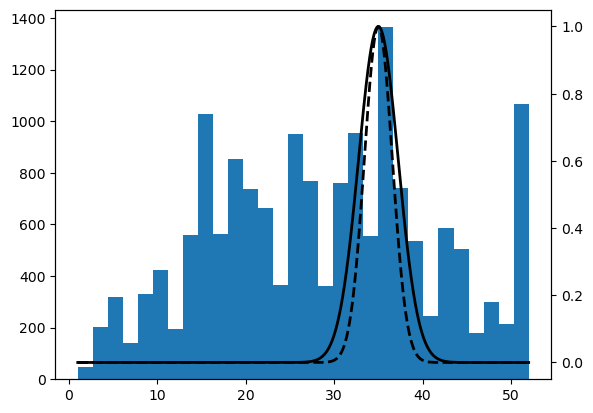

In [112]:
fig , ax = plt.subplots()
ax.hist(train_features_numeric['housing_median_age'] , bins = 30)

housing_ages = np.linspace(train_features_numeric['housing_median_age'].min(), 
                           train_features_numeric['housing_median_age'].max(),
                           1000).reshape(-1 , 1)
rbf1 = rbf_kernel(housing_ages , [[35]] , gamma = 0.1)
rbf2 = rbf_kernel(housing_ages , [[35]] , gamma = 0.2)

ax1 = ax.twinx()
ax1.plot(housing_ages , rbf1 , color = 'black' , lw = 2)
ax1.plot(housing_ages , rbf2 , color = 'black' , lw = 2 , ls = '--')

# TransformedTargetRegressor

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
train_target.to_frame()

,median_house_value
12655,72100.0
15502,279600.0
2908,82700.0
14053,112500.0
20496,238300.0
...,...
15174,268500.0
12661,90400.0
19263,140400.0
19140,258100.0


In [116]:
ss = StandardScaler()

target_values = ss.fit_transform(train_target.to_frame())

In [117]:
target_values

array([[-1.16601465],
       [ 0.62745084],
       [-1.07439665],
       ...,
       [-0.5756836 ],
       [ 0.44162188],
       [-1.2472608 ]])

In [118]:
model = LinearRegression()
model.fit(train_features_numeric[['median_income']] ,
          target_values)

LinearRegression()

In [119]:
prediction = model.predict(train_features_numeric[['median_income']].iloc[:5])

In [120]:
ss.inverse_transform(prediction)

array([[135958.75805364],
       [309735.008975  ],
       [165232.3998617 ],
       [138162.41971241],
       [232903.1766333 ]])

In [121]:
# اسگریپت پایین نتیجه اش عینا مانند بالایی است اما راحتر و خلاصه تر

In [122]:
from sklearn.compose import TransformedTargetRegressor

In [123]:
model = TransformedTargetRegressor(LinearRegression() ,
                                   transformer = StandardScaler())

In [124]:
model.fit(train_features_numeric[['median_income']] ,
          train_target.to_frame())

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=StandardScaler())

In [125]:
model.predict(train_features_numeric[['median_income']].iloc[:5])

array([[135958.75805364],
       [309735.008975  ],
       [165232.3998617 ],
       [138162.41971241],
       [232903.1766333 ]])

# Function Transformer

In [127]:
from sklearn.preprocessing import FunctionTransformer

In [128]:
logarithmic_transformer = FunctionTransformer(np.log , inverse_func = np.exp)
logarithmic_transformer.transform(train_features_numeric[['population']])

,population
12655,7.712891
15502,7.608374
2908,6.502790
14053,6.800170
20496,7.515889
...,...
15174,7.613819
12661,8.469892
19263,6.126869
19140,7.096721


In [129]:
rbf_transformer = FunctionTransformer(rbf_kernel , 
                                     kw_args = {'Y' : [[35.0]] ,
                                                 'gamma' : 0.1})

In [130]:
rbf_transformer.transform(train_features_numeric[['housing_median_age']])

array([[2.73237224e-02],
       [8.93948745e-35],
       [3.03539138e-04],
       ...,
       [4.57533877e-08],
       [7.04065961e-20],
       [1.66155727e-03]])

# TransformerMixin

**Create Estimator**

In [133]:
from sklearn.utils.validation import check_array , check_is_fitted
from sklearn.base import BaseEstimator , TransformerMixin

In [134]:
class CustomStandardScaler(BaseEstimator , TransformerMixin):
    def __init__(self , hp = 0):
        self.hp = hp
    
    def fit(self , X , y = None):
        X = check_array(X)
        self.mean_of_X = X.mean(axis = 0)
        self.std_of_X  = X.std(axis = 0)
        self.n_features_in_ = X.shape[1]
        return self
        
    def transform(self , X):
        check_is_fitted(self)
        assert self.n_features_in_ == X.shape[1]
        X = X - self.mean_of_X
        return X / self.std_of_X

In [135]:
css = CustomStandardScaler()
css.fit_transform(train_features_numeric)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,identifier,room_per_house,bed_rooms_ratio,people_per_house
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.940840,0.017395,-0.121122,0.006223
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,1.171665,0.569256,-0.810867,-0.040811
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.267711,-0.018024,-0.338273,-0.075371
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,1.221501,-0.595140,0.961205,-0.106803
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.437184,0.251241,-0.474513,0.006109
...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,1.251644,0.466353,-0.443846,-0.092580
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,-0.920843,0.050362,-0.516065,0.023024
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,-1.570946,-0.509240,0.322869,-0.037436
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,-1.561010,0.328149,-0.457023,-0.059156


**Pipeline**

In [137]:
from sklearn.pipeline import Pipeline , make_pipeline

In [138]:
numerical_features_pipeline = Pipeline([
    ('medianImputer' , SimpleImputer(strategy = 'median')) ,
    ('MinMaxScaler' , MinMaxScaler())
])

In [139]:
numerical_features_pipeline.fit_transform(train_features_numeric)

array([[0.28784861, 0.63549416, 0.54901961, ..., 0.03093793, 0.0608365 ,
        0.00199273],
       [0.70916335, 0.05844846, 0.11764706, ..., 0.04117562, 0.04459358,
        0.00155426],
       [0.52888446, 0.30074389, 0.84313725, ..., 0.03028086, 0.05572278,
        0.00123207],
       ...,
       [0.1623506 , 0.62699256, 0.92156863, ..., 0.0211682 , 0.07129211,
        0.00158572],
       [0.16434263, 0.61317747, 0.25490196, ..., 0.0367028 , 0.05292632,
        0.00138324],
       [0.22011952, 0.78958555, 0.50980392, ..., 0.03087629, 0.06082296,
        0.00199598]])

**ColumnTransformer**

In [141]:
from sklearn.compose import ColumnTransformer

In [142]:
list(train_features.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'identifier',
 'room_per_house',
 'bed_rooms_ratio',
 'people_per_house']

In [143]:
numerical_features = list(train_features.columns)
numerical_features.remove('ocean_proximity')
categorical_fetures = ['ocean_proximity']

In [144]:
numerical_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'identifier',
 'room_per_house',
 'bed_rooms_ratio',
 'people_per_house']

In [145]:
categorical_fetures

['ocean_proximity']

In [146]:
categorical_features_pipeline = Pipeline([
    ('mfImputer' , SimpleImputer(strategy = 'most_frequent')) ,
    ('ohe' , OneHotEncoder())
])

In [147]:
total_transformation = ColumnTransformer([
    ('numerical' , numerical_features_pipeline , numerical_features) ,
    ('categorical' , categorical_features_pipeline ,  categorical_fetures)
])

In [148]:
total_transformation.fit_transform(train_features)

array([[0.28784861, 0.63549416, 0.54901961, ..., 0.        , 0.        ,
        0.        ],
       [0.70916335, 0.05844846, 0.11764706, ..., 0.        , 0.        ,
        1.        ],
       [0.52888446, 0.30074389, 0.84313725, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1623506 , 0.62699256, 0.92156863, ..., 0.        , 0.        ,
        0.        ],
       [0.16434263, 0.61317747, 0.25490196, ..., 0.        , 0.        ,
        0.        ],
       [0.22011952, 0.78958555, 0.50980392, ..., 0.        , 0.        ,
        0.        ]])

In [149]:
total_transformation.get_feature_names_out()

array(['numerical__longitude', 'numerical__latitude',
       'numerical__housing_median_age', 'numerical__total_rooms',
       'numerical__total_bedrooms', 'numerical__population',
       'numerical__households', 'numerical__median_income',
       'numerical__identifier', 'numerical__room_per_house',
       'numerical__bed_rooms_ratio', 'numerical__people_per_house',
       'categorical__ocean_proximity_<1H OCEAN',
       'categorical__ocean_proximity_INLAND',
       'categorical__ocean_proximity_ISLAND',
       'categorical__ocean_proximity_NEAR BAY',
       'categorical__ocean_proximity_NEAR OCEAN'], dtype=object)

In [150]:
# passthrough

# all of them transformation

In [152]:
train_data , test_data = tts(df , test_size = 0.2 , stratify = df['median_income_categories'] , random_state = 42)

In [153]:
train_data = train_data.drop(columns = 'median_income_categories')
test_data  = test_data.drop(columns  = 'median_income_categories')

In [154]:
train_features = train_data.drop(columns = 'median_house_value')
train_target = train_data['median_house_value']

test_features = test_data.drop(columns = 'median_house_value')
test_target = test_data['median_house_value']

In [155]:
heavy_tail_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median') , 
    FunctionTransformer(np.log , feature_names_out = 'one-to-one') ,
    StandardScaler()
) 

In [156]:
categorical_features_pipeline = Pipeline([
    ('mfImputer' , SimpleImputer(strategy = 'most_frequent')) ,
    ('ohe' , OneHotEncoder())
])

In [157]:
housing_median_age_rbf_transformer = FunctionTransformer(rbf_kernel , 
                                     feature_names_out = 'one-to-one' ,
                                     kw_args = {'Y' : [[35.0]] ,
                                                 'gamma' : 0.1})

In [158]:
default_numerical_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median') ,
    StandardScaler()
)

In [159]:
def ratio_of_columns(X):
    return X[: , [0]] / X[: , [1]]
    
def ratio_of_columns_names(function_transformer , feature_names_in):
    return ['ration']
    
def ratio_of_columns_pipeline():
    return make_pipeline(
        SimpleImputer(strategy = 'median') ,
        FunctionTransformer(ratio_of_columns , feature_names_out = ratio_of_columns_names) ,
        StandardScaler()
    )

In [160]:
all_transformation = ColumnTransformer([
    ('bedrooms' , ratio_of_columns_pipeline() , ['total_bedrooms' , 'total_rooms']) ,
    ('room_per_house' , ratio_of_columns_pipeline() , ['total_rooms' , 'households']) ,
    ('people_per_house' , ratio_of_columns_pipeline() , ['population' , 'households']) ,
    ('log' , heavy_tail_pipeline , ['total_bedrooms' , 'total_rooms' ,
                                    'population' , 'households' , 'median_income']) ,
    ('rbf' , housing_median_age_rbf_transformer , ['housing_median_age']) ,
    ('cat' , categorical_features_pipeline , ['ocean_proximity'])
] , remainder = default_numerical_pipeline)

In [161]:
train_features_transformed = all_transformation.fit_transform(train_features)

In [162]:
train_features_transformed.shape

(16512, 17)

In [295]:
all_transformation.get_feature_names_out()

array(['bedrooms__ration', 'room_per_house__ration',
       'people_per_house__ration', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'rbf__housing_median_age',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__longitude',
       'remainder__latitude', 'remainder__identifier'], dtype=object)